In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
#all the datatypes are correct so now we focus on null values 
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [8]:
#replacing the Fe Male 
df.replace('Fe Male','Female', inplace = True)
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# lets get the null values in descending order
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
CustomerID                    0
ProdTaken                     0
Gender                        0
CityTier                      0
ProductPitched                0
NumberOfPersonVisiting        0
Occupation                    0
MaritalStatus                 0
PitchSatisfactionScore        0
Passport                      0
OwnCar                        0
Designation                   0
dtype: int64

In [13]:
# if we wanna plot the null values
round((df.isnull().sum() / len(df.index))*100 , 2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [16]:
cats = ['ProdTaken','CityTier','PreferredPropertyStar','Passport',
       'OwnCar','PitchSatisfactionScore','TypeofContact','Designation','Occupation','Gender','ProductPitched'
       ,'MaritalStatus']
nums = ['CustomerID', 'Age','DurationOfPitch','NumberOfPersonVisiting',
       'NumberOfFollowups','NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

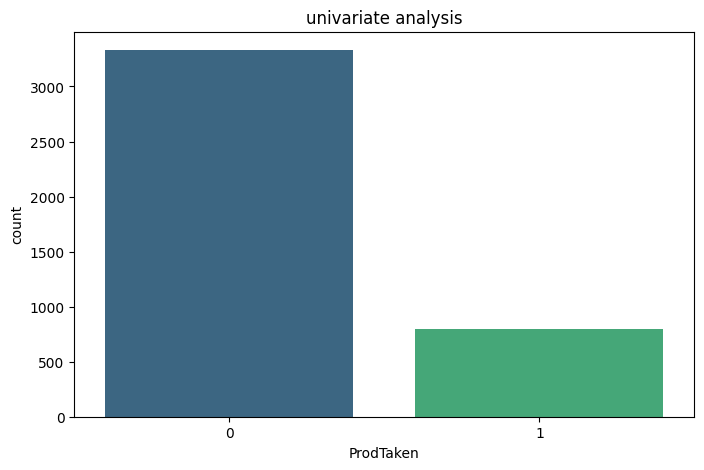

In [17]:
#univariate analysis for categorical columns
plt.figure(figsize = (8,5))
sns.countplot(x = 'ProdTaken', data =df, palette='viridis')
plt.title('univariate analysis')
plt.show()

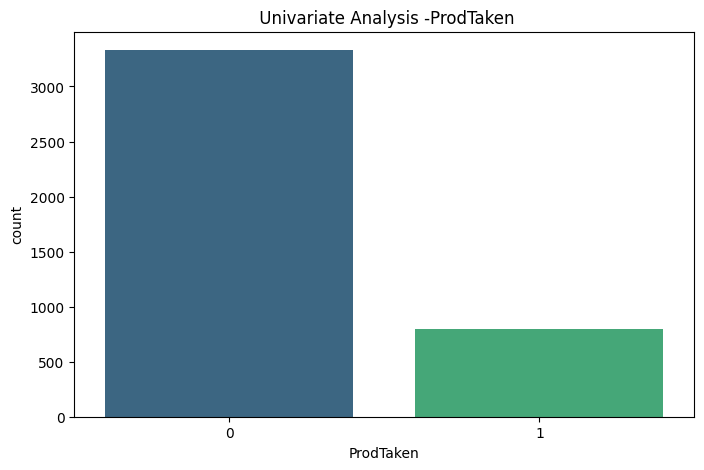

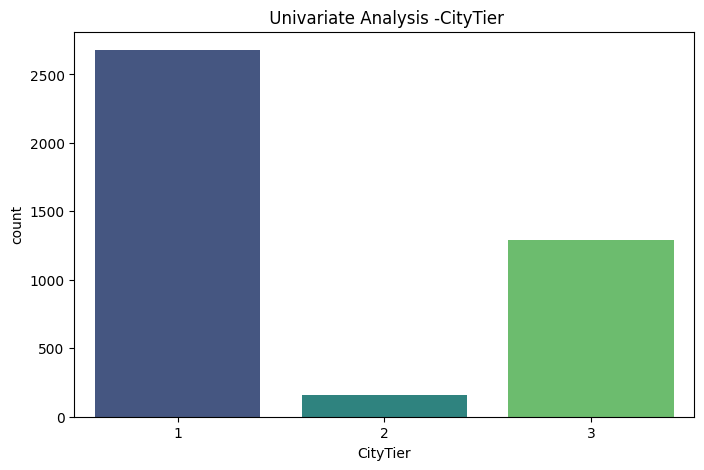

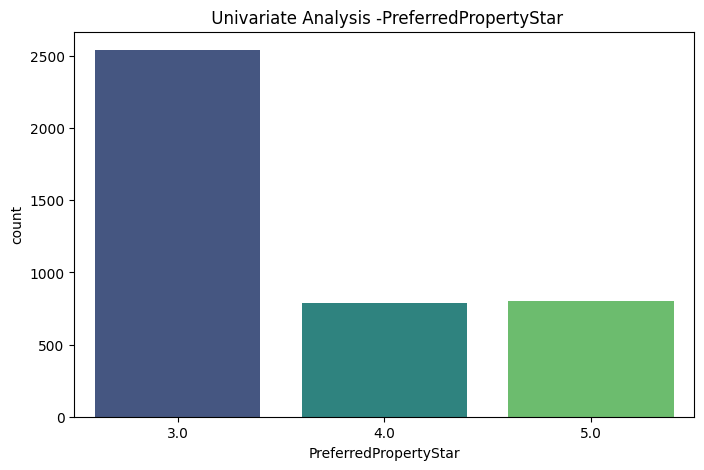

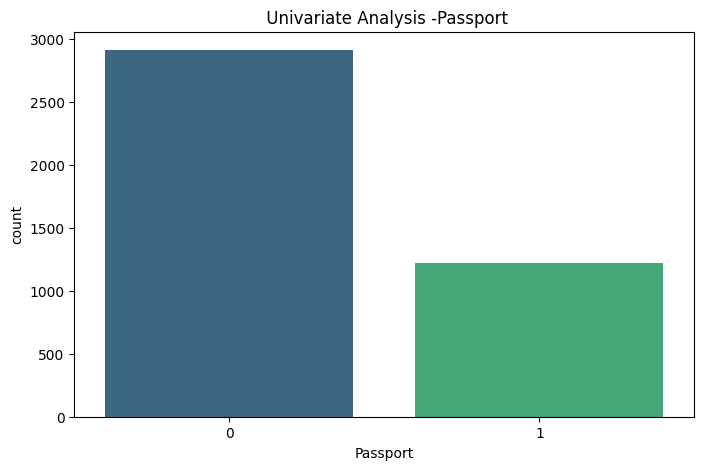

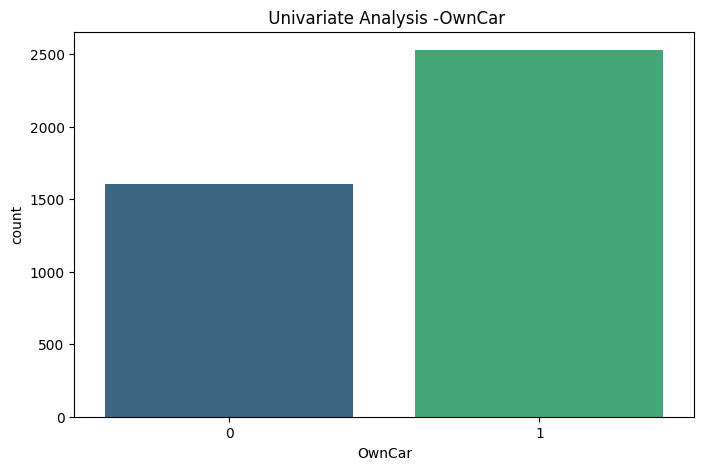

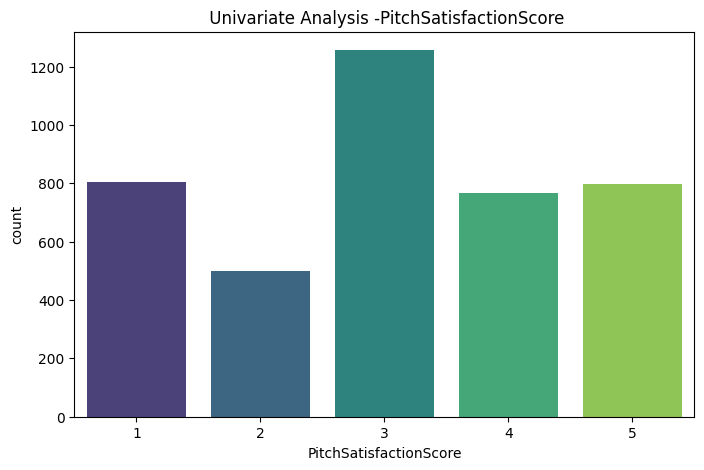

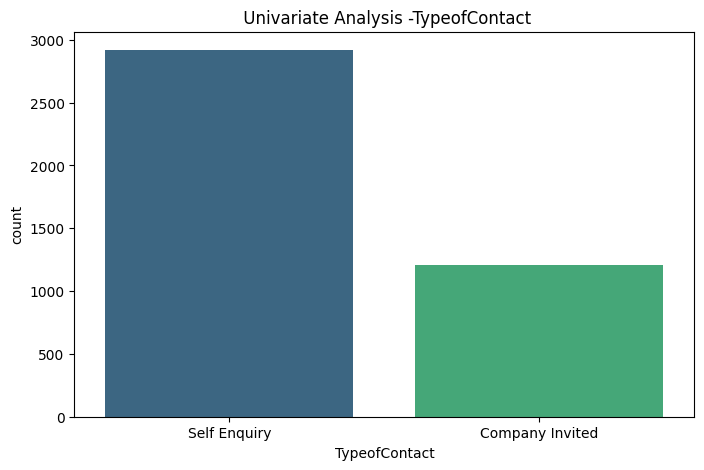

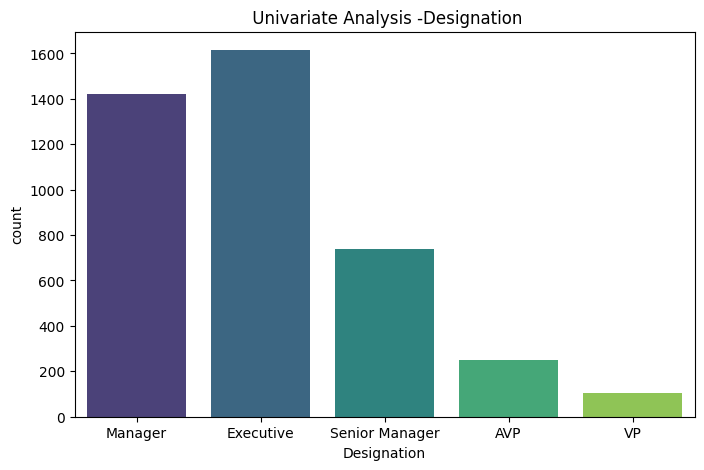

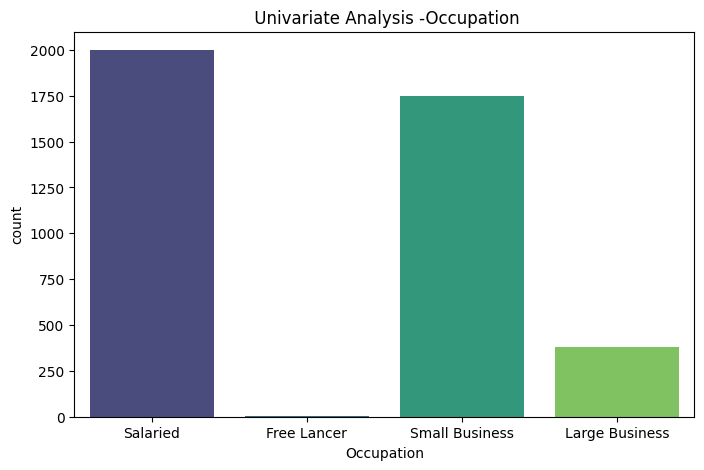

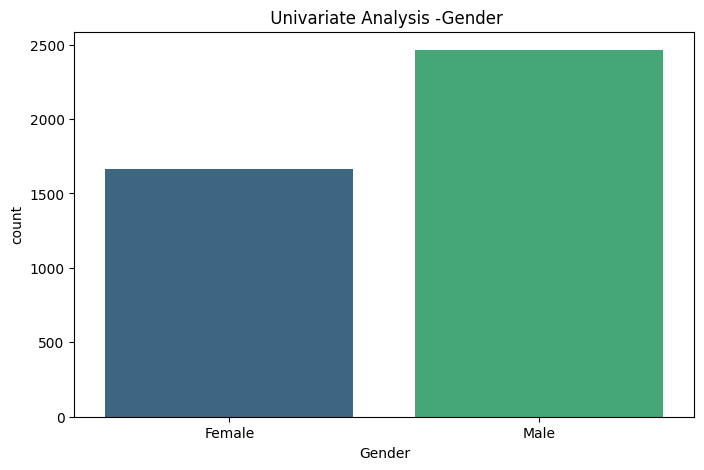

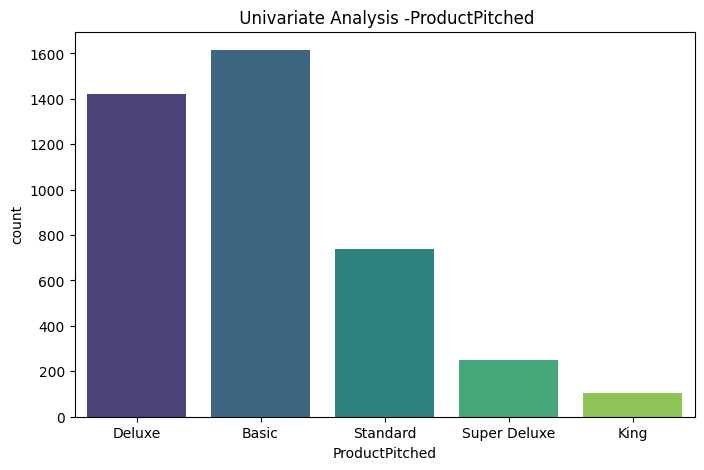

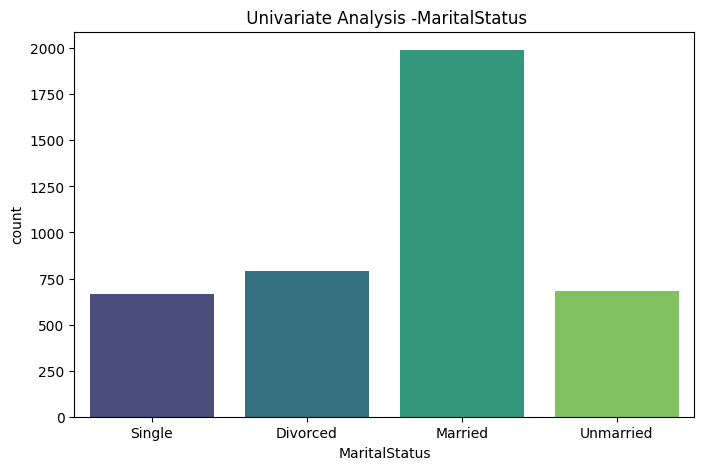

In [18]:
# we cant do the plot for each col so we automate it
for col in cats:
    plt.figure(figsize=(8,5))
    sns.countplot(x = col, data =df, palette = 'viridis')
    plt.title(f' Univariate Analysis -{col}')
    plt.show()

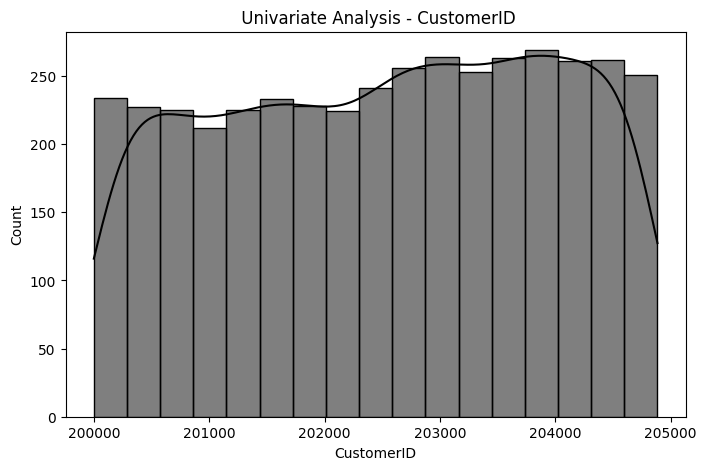

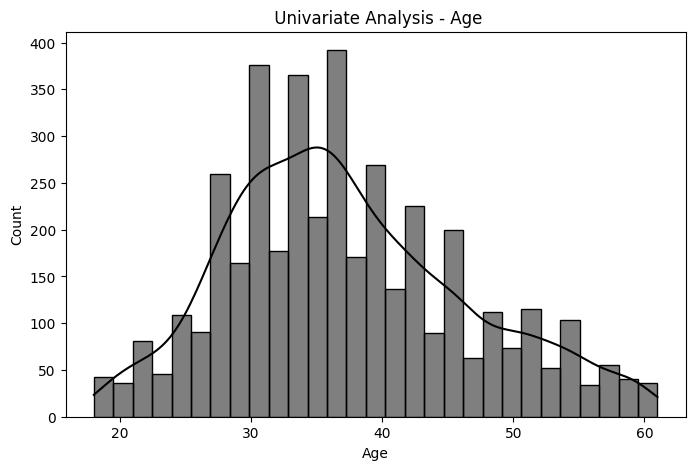

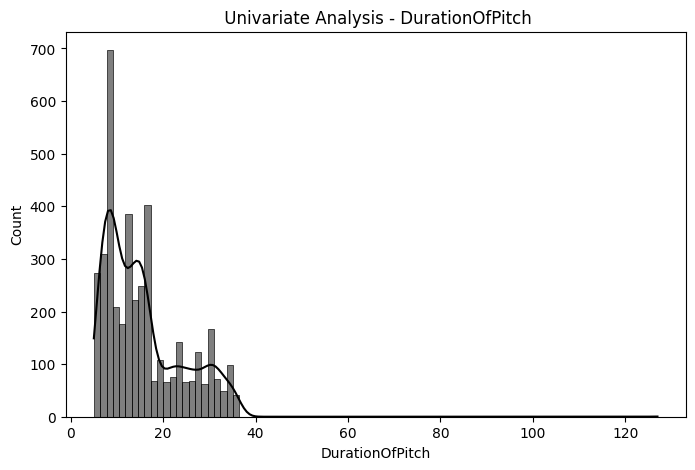

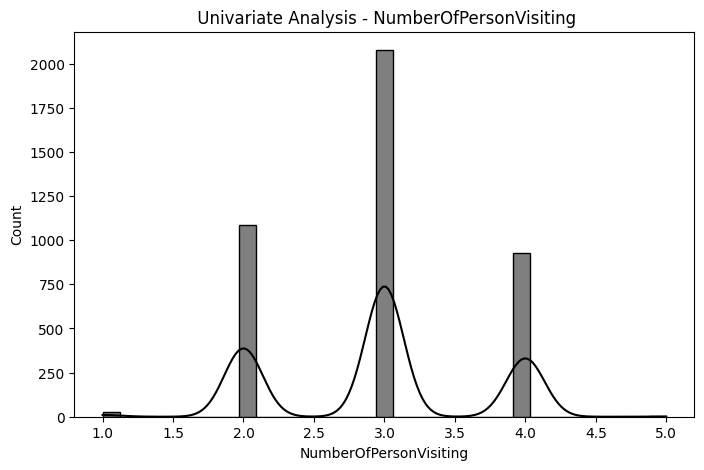

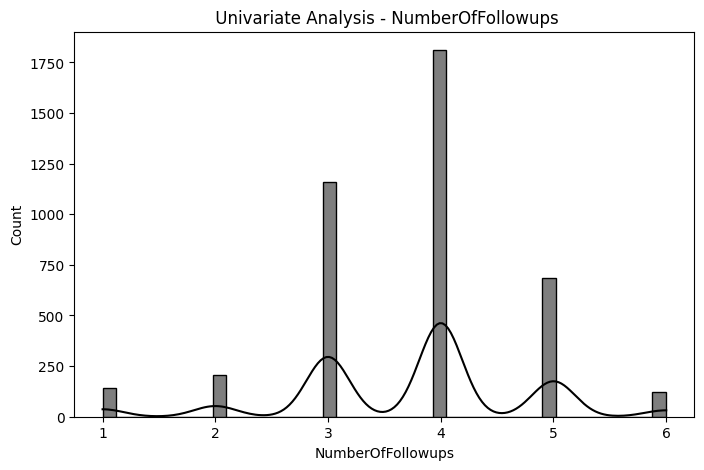

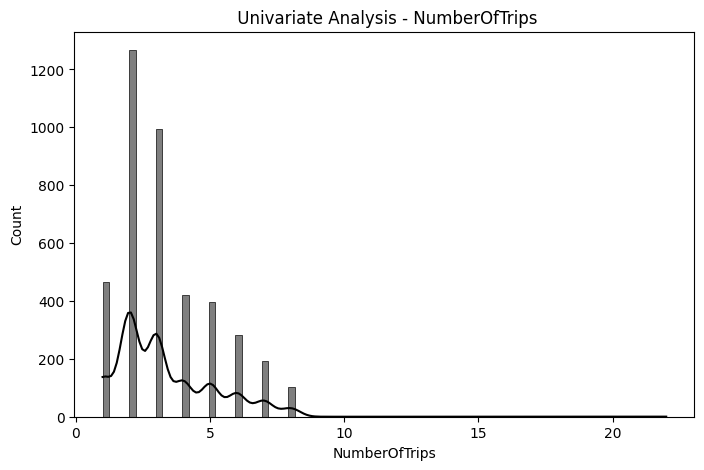

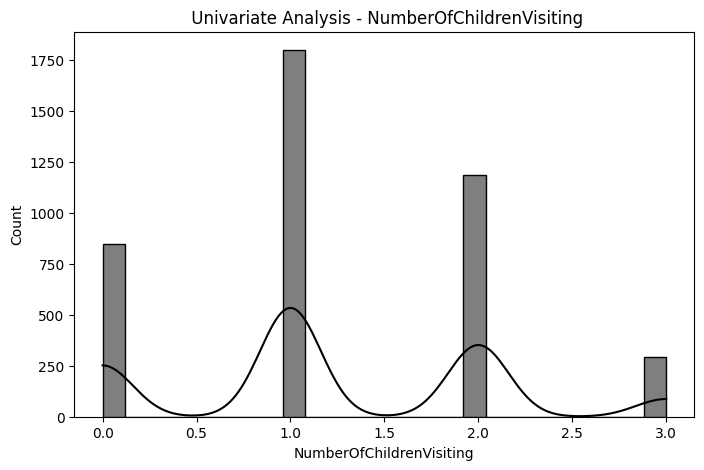

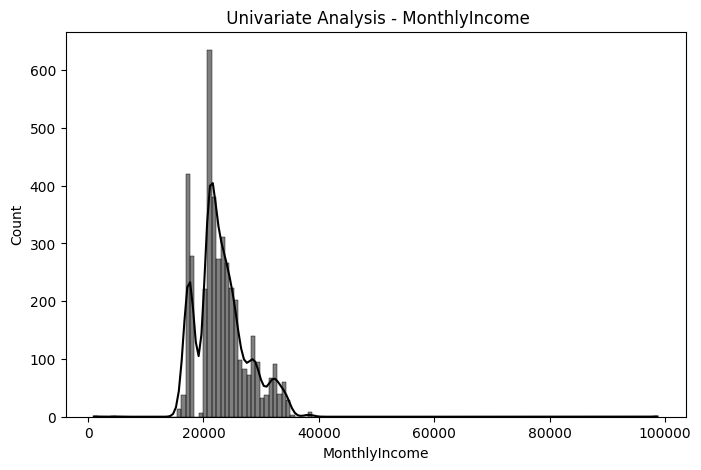

In [20]:
#univariate analysis on numerical col - automation
for col in nums:
    plt.figure(figsize = (8,5))
    sns.histplot(df[col],kde = True, color = 'black')
    plt.title(f' Univariate Analysis - {col}')
    plt.show()

In [21]:
df[cats].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [22]:
df[cats] = df[cats].astype('object')

In [24]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Designation,4128,5,Executive,1615
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463


In [26]:
# to check for unique values in cols all at once
for col in cats:
    x = df[col].unique()
    print(f'{col} unique values: {x}\n')
    

ProdTaken unique values: [1 0]

CityTier unique values: [3 1 2]

PreferredPropertyStar unique values: [3.0 4.0 5.0]

Passport unique values: [1 0]

OwnCar unique values: [1 0]

PitchSatisfactionScore unique values: [2 3 5 4 1]

TypeofContact unique values: ['Self Enquiry' 'Company Invited']

Designation unique values: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']

Occupation unique values: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender unique values: ['Female' 'Male']

ProductPitched unique values: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus unique values: ['Single' 'Divorced' 'Married' 'Unmarried']



<Axes: xlabel='Age', ylabel='DurationOfPitch'>

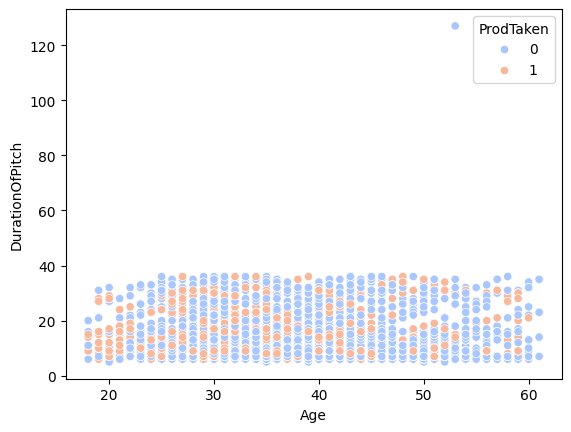

In [27]:
#bivariate analysis
sns.scatterplot(x = 'Age',y = 'DurationOfPitch', data =df, hue='ProdTaken', palette='coolwarm')

In [28]:
#stacked bar chart between marital status and product taken
cross_tab = pd.crosstab(df['MaritalStatus'],df['ProdTaken'], normalize='index') #normalize gives percentage
cross_tab

ProdTaken,0,1
MaritalStatus,,
Divorced,0.866920,0.133080
Married,0.857789,0.142211
Single,0.635682,0.364318
Unmarried,0.756598,0.243402


<Axes: xlabel='MaritalStatus'>

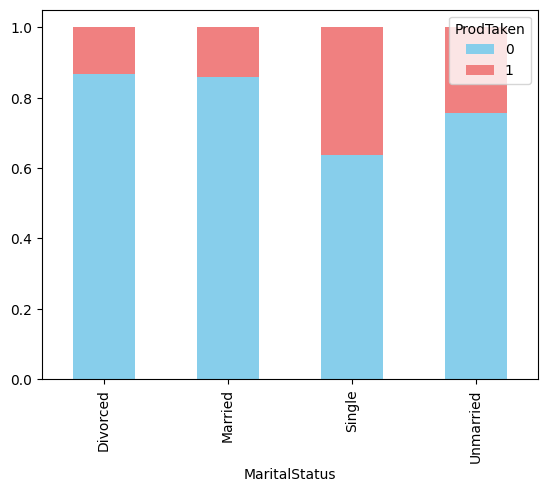

In [29]:
cross_tab.plot(kind = 'bar', stacked = True, color = ['skyblue', 'lightcoral'])

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

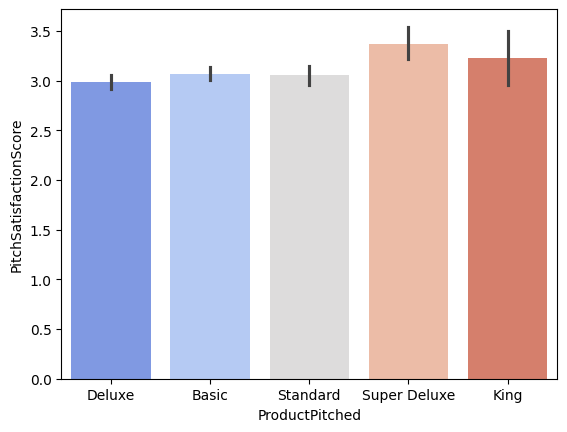

In [30]:
sns.barplot(x = 'ProductPitched', y = 'PitchSatisfactionScore', data=df, palette='coolwarm')

In [31]:
df.drop('CustomerID', inplace = True, axis=1)

In [32]:
#feature engineering 
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [33]:
#no of person visiting and no of childern visiting combinely gives total persons visiting
df['TotalVisiting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']

In [34]:
#Separating the numerical features
num_features = [col for col in df.columns if df[col].dtype != 'O']
num_features

['Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome',
 'TotalVisiting']

In [35]:
#Separating the categorical features
cat_features = [col for col in df.columns if df[col].dtype == 'O']
cat_features

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'Designation']

In [36]:
#some cols are discrete but categorical in nature like passport 0/1 by looking its a numerical col but its a categorical column 
discrete_features = [col for col in df.columns if len(df[col].unique())<=5]
discrete_features

['ProdTaken',
 'TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation']

In [37]:
X = df.drop('ProdTaken', axis = 1)
y = df['ProdTaken']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [39]:
# to get the object datatypes from X 
X.select_dtypes(include = 'object').columns

Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')

In [40]:
cat_features = X.select_dtypes(include = 'object').columns
num_features = X.select_dtypes(exclude = 'object').columns

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler # both are data transformers
from sklearn.compose import ColumnTransformer

#col transformer applies transformation to columns of an array or pandas dataframe


In [42]:
#we are dng scaling and one hot encoding at the same time
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer, cat_features),
        ('StandardScaler',numeric_transformer, num_features)
    ]
)

In [43]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [44]:
X_train = preprocessor.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.281479,-0.796421,0.057768,0.256856,0.383660,-0.272947,-0.098893,-0.136323
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.155992,1.771606,1.450094,0.256856,1.466898,2.071063,1.965953,2.000416
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,-0.904805,0.059588,-1.334558,-0.742130,-0.699577,-0.272947,-1.298363,-0.848570
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.516279,0.059588,1.450094,0.256856,0.383660,-0.272947,-0.499232,0.575923
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.123433,0.181875,0.057768,-2.740101,-1.241196,-0.272947,-1.246030,-0.136323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.406965,-1.040995,1.450094,1.255842,-0.157958,0.899058,1.988255,1.288169
3298,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,-0.686177,0.059588,-1.334558,-0.742130,0.925279,-0.272947,0.630240,-0.848570
3299,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.374621,-0.796421,0.057768,1.255842,-0.699577,-0.272947,-0.467876,-0.136323
3300,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.079023,0.181875,0.057768,0.256856,0.383660,0.899058,-0.066654,0.575923


In [45]:
preprocessor.transform(X_test)

array([[ 1.        ,  0.        ,  0.        , ..., -1.44495268,
        -0.26825893, -0.84856965],
       [ 0.        ,  0.        ,  0.        , ...,  0.89905801,
         0.25639882,  0.57592297],
       [ 1.        ,  0.        ,  0.        , ...,  0.89905801,
        -1.36107508,  0.57592297],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.27294734,
         0.57878952, -0.13632334],
       [ 1.        ,  0.        ,  1.        , ..., -0.27294734,
        -1.21401192, -0.84856965],
       [ 1.        ,  0.        ,  0.        , ..., -0.27294734,
        -0.06753759, -0.13632334]], shape=(826, 34))